# Analysing Telecom Market Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing

In [2]:
# viewing dataset
telecom_churn = pd.read_csv("telecom_churn.csv")
telecom_churn.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [3]:
# looking for NaN values
telecom_churn.isnull().values.any()

False

## Descriptive Statistics

In [4]:
stats = telecom_churn.describe()
stats

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
stats.iloc[1:]

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


On observation a few patterns can be seen and compared. <br>
1) Mean number of minutes a phone is used during the day are 179.78, during evening and night are 201 each. This shows that the phone is mostly used during evening and night. <br>
2) Mean number of calls during the day, night and evening are all 100 <br>
3) Charges during day are 31, 17 for the evening and 9 for night. <br>
5) Mean international calls are 4.5, minutes are 10.23 costing 2.8 <br>
6) Average number of customer service calls made by the customers are 1.56 which is an indicator that the operations of the telecom market are being held successfully with little amount of complains or ambuiguities to be addressed <br>
7) The calls made during night, day and evening are all equal even tho the charges are different which suggests that charges donot have a correlation with the number of calls made. <br>
8) The phone is used least during the day as the charges are highest, while it is used equally during day and night even though the charges are lower at night time <br>
9) Mean international calls and minutes are comparitively way less according to the charges for them, hence these should be promoted.

## Usage Patterns and Trends

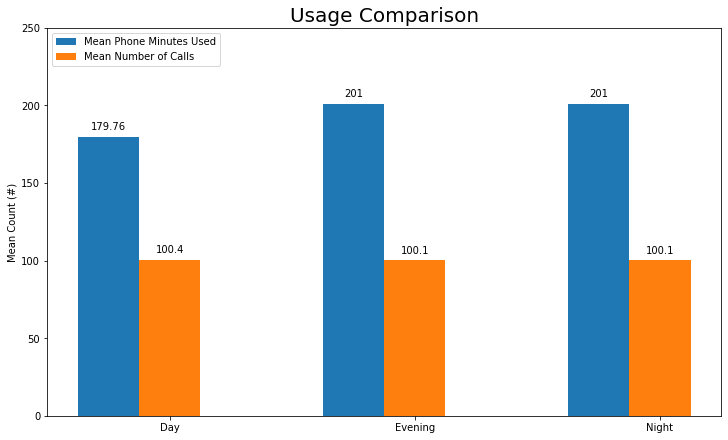

In [6]:
time = ("Day", "Evening", "Night")
usage_means = {
    'Mean Phone Minutes Used': (179.76, 201, 201),
    'Mean Number of Calls': (100.4, 100.1, 100.1),
}

x = np.arange(len(time))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained',figsize = (10,6))

for attribute, measurement in usage_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=5)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Count (#)')
ax.set_title('Usage Comparison',fontsize=20)
ax.set_xticks(x + width, time)
ax.legend(loc='upper left')
ax.set_ylim(0, 250)

plt.show()

This information can guide pricing decisions, such as setting competitive rates for different usage tiers, offering bundled plans, or introducing pricing incentives for specific usage patterns. For example, the data reveals a high demand for phone usage during the night and evening, the company might introduce discounted rates during these times to attract more customers.<br><br>
Analyzing usage patterns can also inform the design and customization of service plans. Telecom companies can tailor their plans to meet the specific needs and preferences of their customer base. For instance, number of calls can be increased through providing enhanced call features like video call to attract more customers.<br><br>
Usage patterns provide insights into the demand for telecom services at different times. By analyzing the data, companies time periods with high call volumes or heavy phone usage. This information is valuable for making informed decisions about infrastructure investments. Telecom providers can allocate resources to improve network coverage, capacity, and quality during the evening and night in this case.

## Churn Rate Analysis
Churn rate refers to the percentage of customers who cancel their subscriptions within a given period. By analyzing churn rate data, telecom companies can gain insights into the effectiveness of their customer retention strategies. They can examine how successful their efforts have been in retaining customers and identify areas for improvement.

In [7]:
# Calculating churn rate
# churn rate = # customers who churned / total # customters
customers = telecom_churn.shape[0]
churn_cust = telecom_churn['Churn'][telecom_churn['Churn']==True].count()
churn_rate = churn_cust/customers
churn_rate

0.14491449144914492

This depicts a low churn rate of 14.5% which suggests that the company's retention efforts are working well, and they can further analyze successful strategies to replicate and scale them across the customer base.

### Customer Segmentation and Targeted Retention Efforts
Churn rate analysis allows for customer segmentation based on various attributes such as demographics, usage patterns, or subscription types. By segmenting customers, companies can identify specific groups that are more prone to churn. They can then develop targeted retention efforts for each segment, tailoring strategies and offers to address the specific needs and preferences of those customers.

In [8]:
telecom_churn.groupby('Churn').agg(np.mean)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Churn,,,,,,,,,,,,,,,,
False,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
True,102.664596,437.817805,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


The customers who churn donot use voice mail messages as much and also have a higher number of mean customer service calls which probably suggests that these calls are made due to complains. Given these insights, voice mail messages need to be promoted and customer service needs to be improved to provide efficent and quick solutions and help to customers to further lessen the churn rate.

## Comparitive Analysis Based on Geographical Location

In [9]:
def plot_state_bar(y, title, yl):
    fig, ax = plt.subplots(figsize = (30,12))
    bar_container = ax.bar(geo_telecom.index, round(y,2),width=0.5)
    ax.set_title(label =title, fontsize=35)
    ax.set_xlabel(xlabel ='State', fontsize=20)
    ax.set_ylabel(ylabel =yl, fontsize=20)
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    #add horizontal line at mean value of y
    plt.axhline(y=np.nanmean(y), color = 'red',linestyle='--', linewidth=3, label='Avg')
    ax.bar_label(bar_container,fontsize=15)

In [10]:
geo_telecom = telecom_churn.groupby('State').agg(np.mean)
geo_telecom

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
State,,,,,,,,,,,,,,,,,
AK,97.192308,438.692308,9.057692,178.384615,95.269231,30.325769,184.282692,96.576923,15.664231,192.326923,97.346154,8.654808,10.019231,4.807692,2.705385,1.557692,0.057692
AL,98.025000,430.625000,7.175000,186.010000,99.100000,31.621500,195.462500,98.462500,16.614500,187.285000,98.612500,8.427875,10.292500,4.700000,2.779000,1.562500,0.100000
AR,96.981818,439.254545,7.200000,176.116364,102.145455,29.940000,201.047273,97.836364,17.089636,205.454545,99.054545,9.245818,10.372727,4.690909,2.800727,1.981818,0.200000
AZ,100.468750,432.656250,9.468750,171.604688,100.109375,29.173125,187.748437,102.406250,15.958906,194.004687,99.984375,8.730625,10.631250,4.859375,2.870625,1.593750,0.062500
CA,99.235294,441.500000,9.000000,183.564706,104.500000,31.206176,198.970588,103.088235,16.913529,198.508824,99.205882,8.932941,9.867647,4.441176,2.665588,1.470588,0.264706
CO,102.545455,429.621212,8.363636,178.712121,95.121212,30.381818,206.884848,98.166667,17.584848,189.898485,97.060606,8.546061,9.871212,4.106061,2.665758,1.787879,0.136364
CT,99.040541,429.608108,9.067568,175.140541,98.432432,29.774324,203.828378,99.121622,17.325946,205.997297,102.283784,9.270405,10.050000,4.108108,2.713378,1.513514,0.162162
DC,105.722222,436.055556,9.740741,171.379630,100.166667,29.135370,196.272222,101.981481,16.684074,206.348148,97.666667,9.285741,10.605556,3.907407,2.864630,1.351852,0.092593
DE,101.918033,439.983607,6.967213,174.583607,98.639344,29.680164,208.247541,97.360656,17.701311,203.900000,101.213115,9.175574,10.285246,4.295082,2.778361,1.622951,0.147541


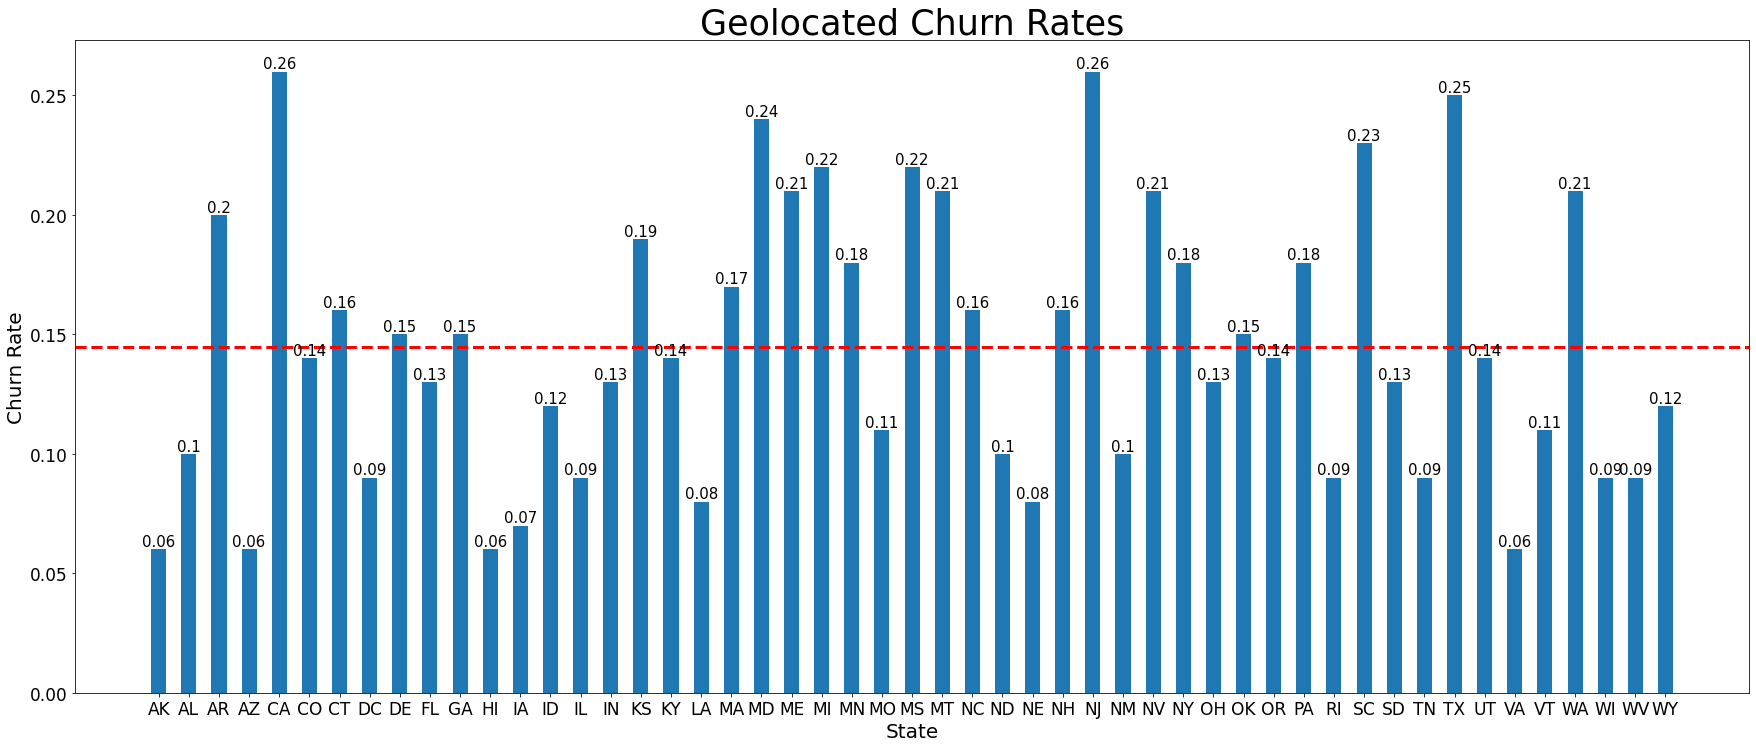

In [11]:
plot_state_bar(geo_telecom['Churn'], "Geolocated Churn Rates", 'Churn Rate')

Mean churn rates for the states; CA, MD, MS, NJ, SC and TX are comparitively higher than the other, hence they need to be targetted and strategies should be deployed to reduce these churn rates. It can also be noted that states like AK, AZ, HI and VA are performing exceptionally as the churn later are extremely low, hence these states operational plans can be monitored and be taken as inspiration for reducing churn rates in other states 

In [12]:
geo_telecom.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,101.081106,437.220301,8.122651,179.706973,100.467658,30.550726,201.027789,100.187734,17.087583,200.745454,100.016273,9.033634,10.226460,4.476438,2.761677,1.560824,0.144927
std,4.326648,4.882822,1.259303,6.851369,2.726969,1.164719,6.456374,2.890668,0.548802,5.948809,2.332678,0.267689,0.339123,0.269043,0.091551,0.165249,0.057579
min,91.830508,427.358491,4.560606,166.441667,94.816667,28.295833,184.282692,94.969231,15.664231,187.285000,94.016667,8.427875,9.331373,3.866667,2.520196,1.137931,0.056604
25%,98.364318,433.118887,7.187500,175.456119,99.032143,29.828011,196.896126,98.111635,16.736108,197.045829,99.041558,8.866883,9.995366,4.327684,2.699396,1.455315,0.095557
50%,101.166667,438.102564,8.239437,178.619178,100.328767,30.365753,201.496154,99.783333,17.127564,200.193548,100.424658,9.008387,10.275926,4.500000,2.775185,1.568627,0.136364
75%,104.458904,440.007692,9.062630,183.459734,102.231357,31.188564,205.598532,101.983891,17.476155,204.972786,101.501490,9.223871,10.480801,4.668984,2.830596,1.673852,0.183219
max,109.571429,448.272727,10.433333,197.228571,107.056338,33.529571,214.664615,108.920635,18.247077,212.963636,105.425926,9.583766,10.901429,4.974026,2.943571,1.981818,0.264706


As seen standard deviation for number of voice mails, total day calls, day charge, evening charge, night charge and international indicators is very less hence we will only see state-wise trends for attributes with higher standard deviation

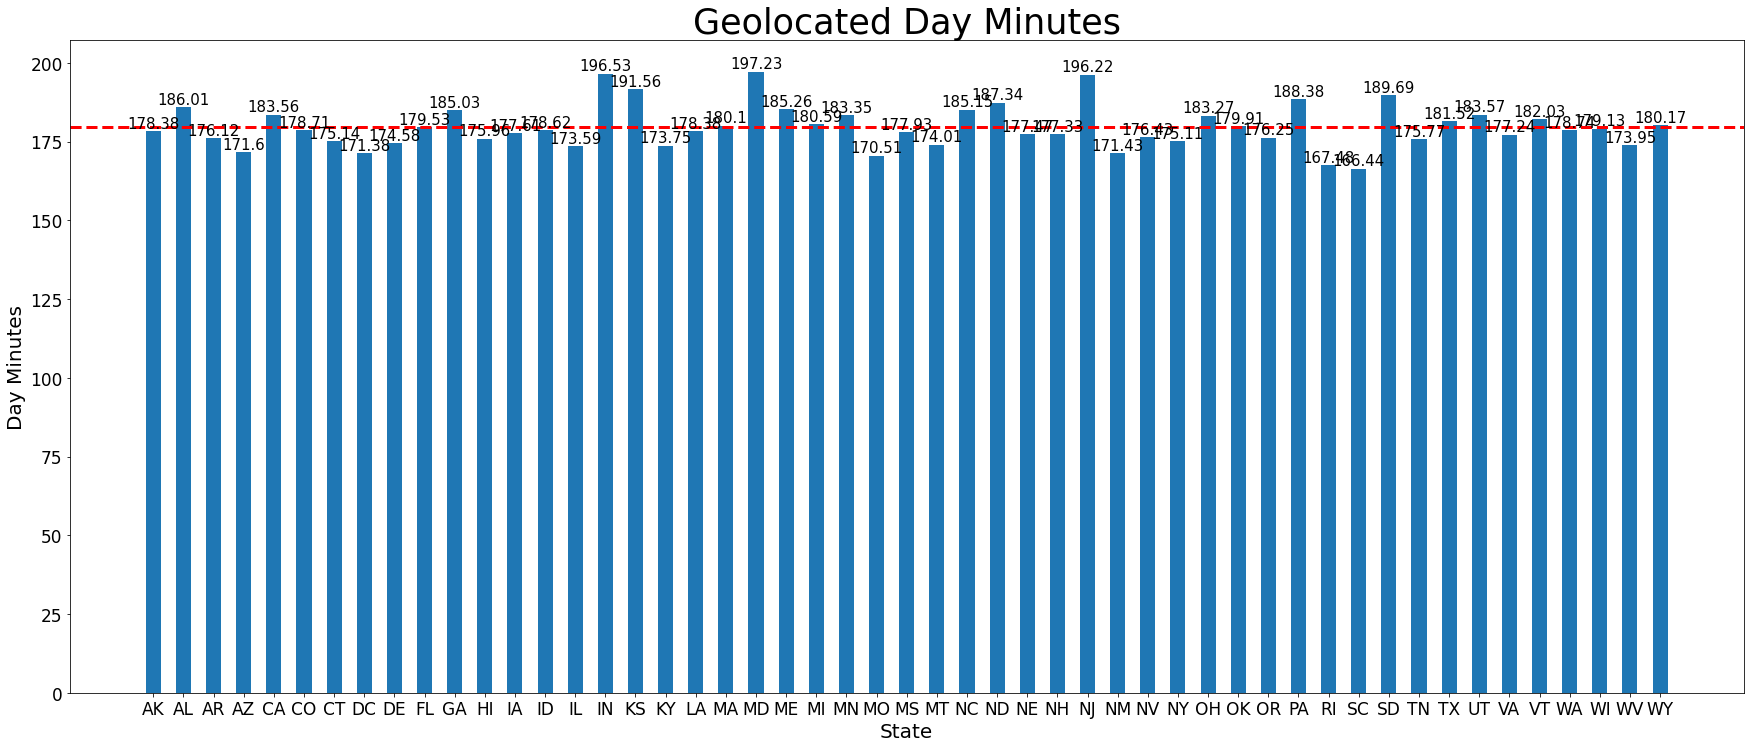

In [13]:
plot_state_bar(geo_telecom['Total day minutes'], "Geolocated Day Minutes", 'Day Minutes')

Here the states, AZ, DC, MO, NM, RI AND SC need to be targetted to improve phone usage during the day.

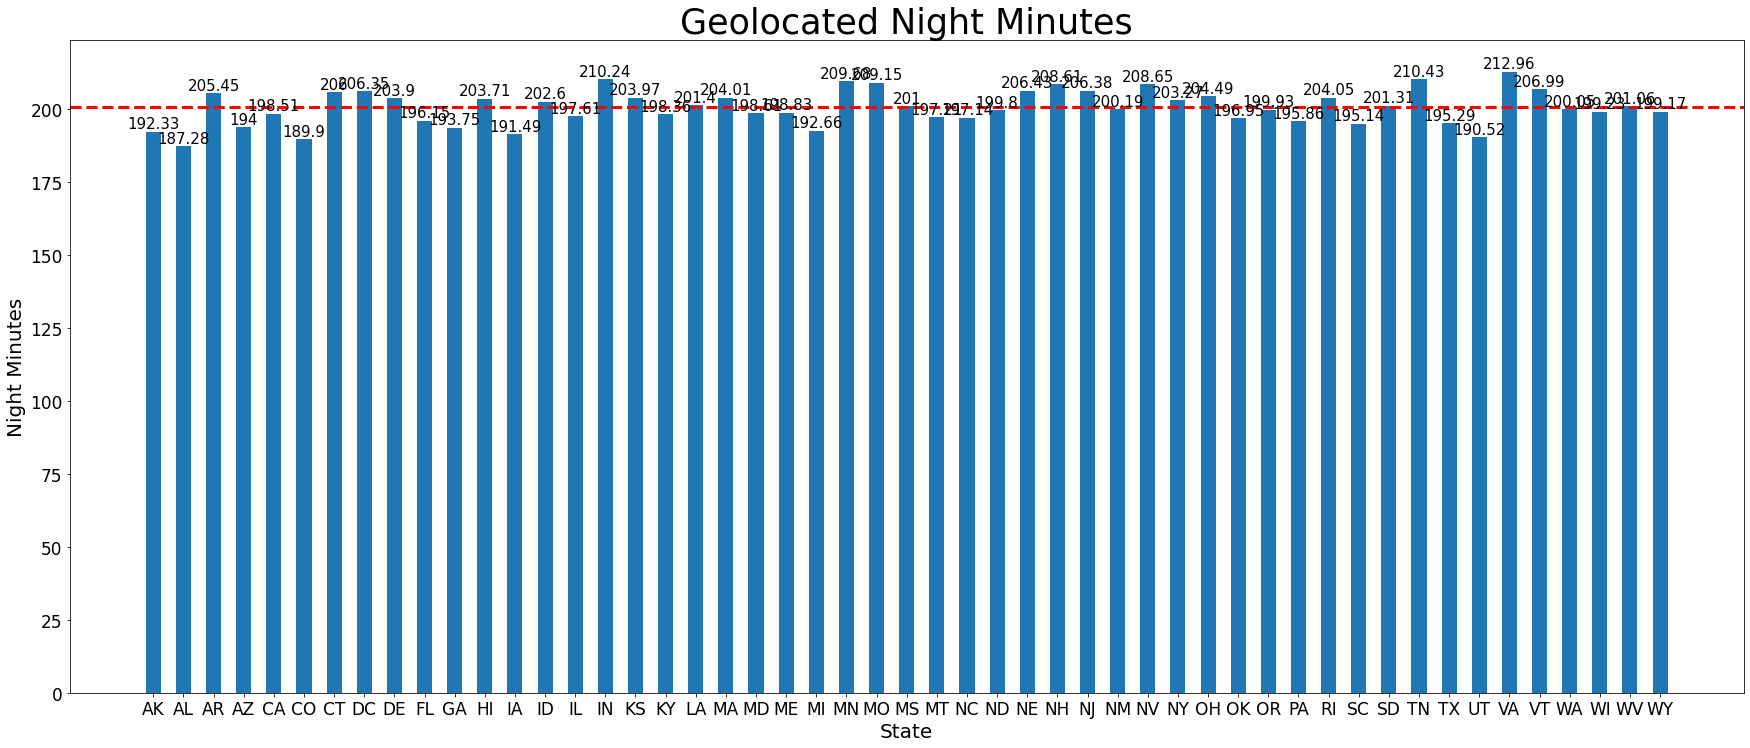

In [14]:
plot_state_bar(geo_telecom['Total night minutes'], "Geolocated Night Minutes", 'Night Minutes')

Here the states, AL, CO and UT need to be targetted to improve phone usage during the night.

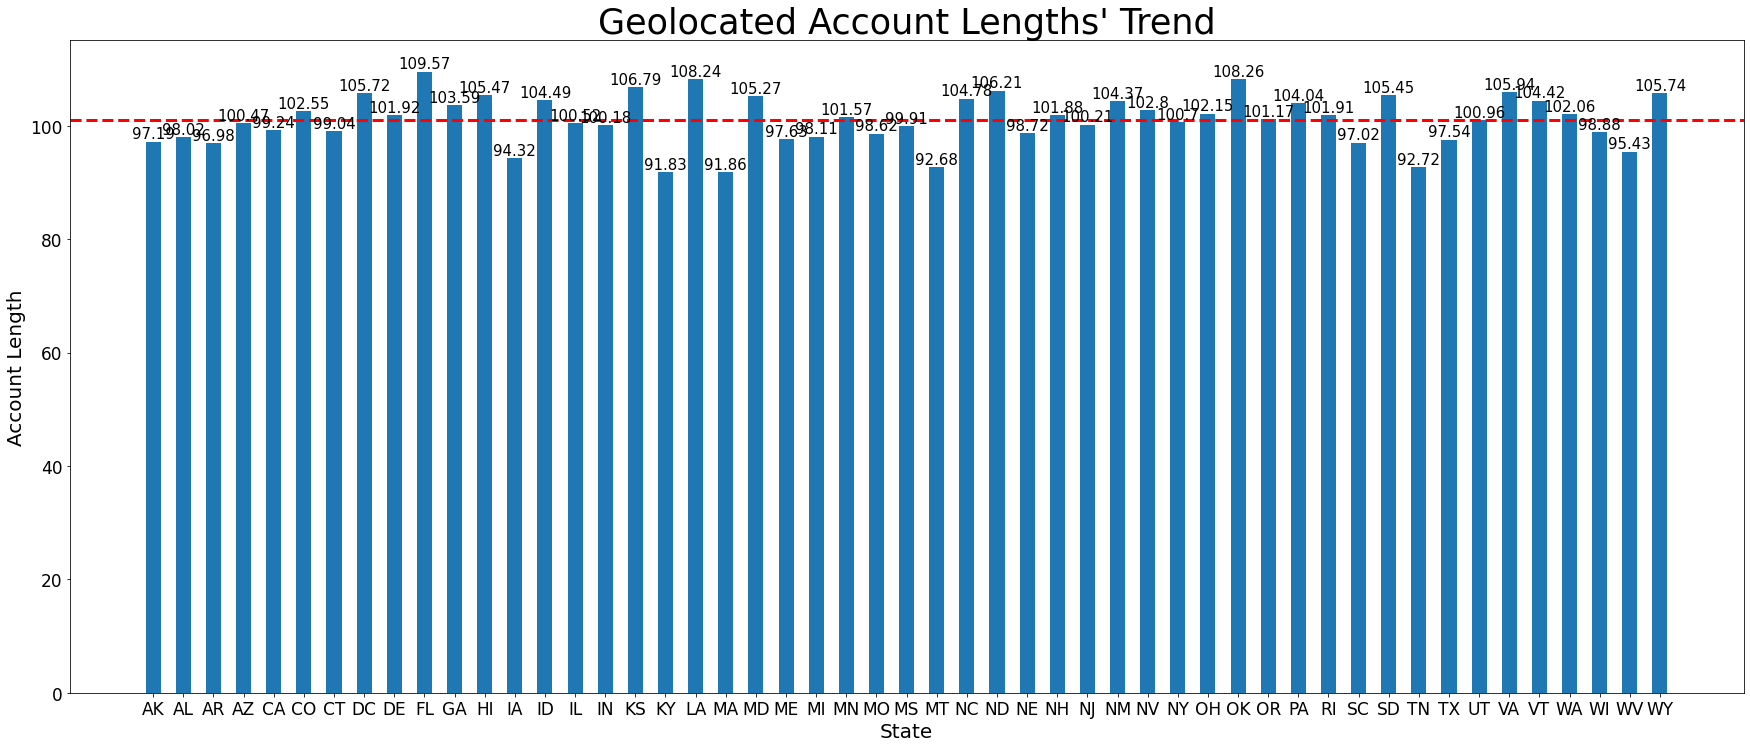

In [15]:
plot_state_bar(geo_telecom['Account length'], "Geolocated Account Lengths' Trend", 'Account Length')

This shows that states like KS, MA, MT and TN need to be targetted to improve the mean account length which is an indicater of long term and permanaent customers of the company

# Task 1 Part b

In [16]:
# linear regression for multioutput regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Performing one hot encoding

In [17]:
# Perform one-hot encoding on State
encoded_states = pd.get_dummies(telecom_churn['State'], prefix='State')

# Concatenate the encoded state columns with the original dataframe
df_encoded = pd.concat([telecom_churn, encoded_states], axis=1)

# Drop the original 'State' column
df_encoded.drop('State', axis=1, inplace=True)

# Print the updated dataframe
df_encoded.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,415,No,Yes,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,No,Yes,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,No,No,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,Yes,No,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,Yes,No,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_encoded.columns

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn', 'State_AK',
       'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT',
       'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA',
       'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA',
       'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO',
       'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH',
       'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK',
       'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN',
       'Stat

In [19]:
# converting columns to numeric data
df_encoded['International plan'] = df_encoded['International plan'].astype(bool).astype(int)
df_encoded['Voice mail plan'] = df_encoded['Voice mail plan'].astype(bool).astype(int)

In [20]:
# defining features and target variable
X = df_encoded.loc[:, df_encoded.columns != 'Churn']
y = df_encoded['Churn']
X.shape, y.shape

((3333, 69), (3333,))

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression Model

In [22]:
# Create a Logistic Regression model and fit the model on the training data
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy score achieved using Logistic Regression: "+str(accuracy)+" %")

The accuracy score achieved using Logistic Regression: 0.848575712143928 %


## Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
# Create a Random Forest Classifier and fit the model on the training data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy score achieved using Random Forest Classifier: "+str(accuracy)+" %")

The accuracy score achieved using Random Forest Classifier: 0.9115442278860569 %


## Support Vector Machine

In [25]:
from sklearn import svm

In [26]:
sv = svm.SVC(kernel='linear')

sv.fit(X_train, y_train)

Y_pred_svm = sv.predict(X_test)

score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM: 84.86 %


## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
Y_pred_dt = dt.predict(X_test)

In [29]:
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree: 88.61 %


In terms of accuracy the best model to use when predicting churn is random forest classifier which has an accuracy of 91.15%, the best performance among all other models implemented